# CODING TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND IMPORT LIBRARIES/DATASETS

- In this hands-on project, we will train a multiple linear regression model to predict the price of used cars.
- This project can be used by car dealerships to predict used car prices and understand the key factors that contribute to used car prices.
- Features (inputs): 
    - Make 
    - Model
    - Type
    - Origin 
    - Drivetrain
    - Invoice
    - EngineSize
    - Cylinders
    - Horsepower
    - MPG_City
    - MPG_Highway
    - Weight
    - Wheelbase
    - Length
- Outputs: MSRP (Price)



In [2]:
# Import Numpy and check the version
import numpy as np
print(np.__version__)

1.21.6


In [3]:
# Import Pandas and check the version
import pandas as pd
print(pd.__version__)

1.3.5


In [4]:
# Updgrade Numpy version
!pip3 install numpy --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [5]:
# Updgrade Pandas version
!pip3 install pandas --upgrade

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # Interactive Data Visualization

In [7]:
# Read the CSV file 
car_df = pd.read_csv("used_car_price.csv")

In [8]:
# Load the top 6 instances
car_df.head(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100,3.5,6,225,18,24,3893,115,197


In [9]:
# Load the bottom 6 instances 
car_df.tail(6)

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
422,Volvo,S80 2.5T 4dr,Sedan,Europe,All,37885,2.5,5,194,20,27,3691,110,190
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,35145,2.5,5,208,20,27,3823,109,186


In [10]:
# Display the feature columns
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [11]:
# Check the shape of the dataframe
car_df.shape

(428, 14)

In [12]:
# Check if any missing values are present in the dataframe
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [13]:
car_df = car_df.dropna()

In [14]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 50.2+ KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **What is the maximum price of the used car?**
- **What is the minimum price of the used car?**

# CODING TASK #2: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION - PART #1

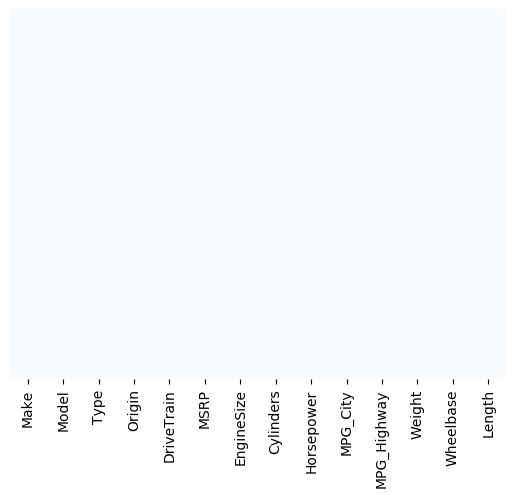

In [18]:
# check if there are any Null values
sns.heatmap(car_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.show()


In [19]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
EngineSize     float64
Cylinders        int64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

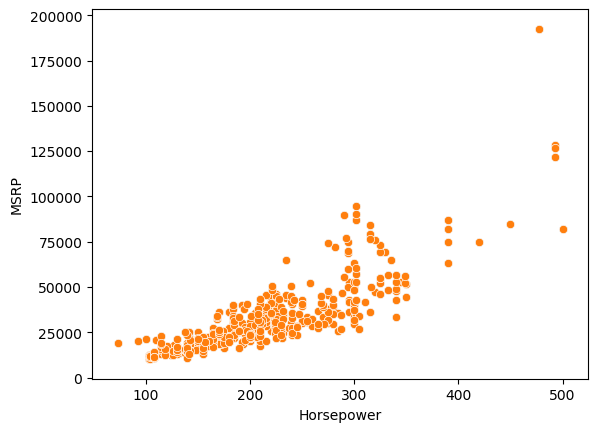

In [21]:
sns.scatterplot(x = 'Horsepower', y = 'MSRP', data = car_df)
plt.show()

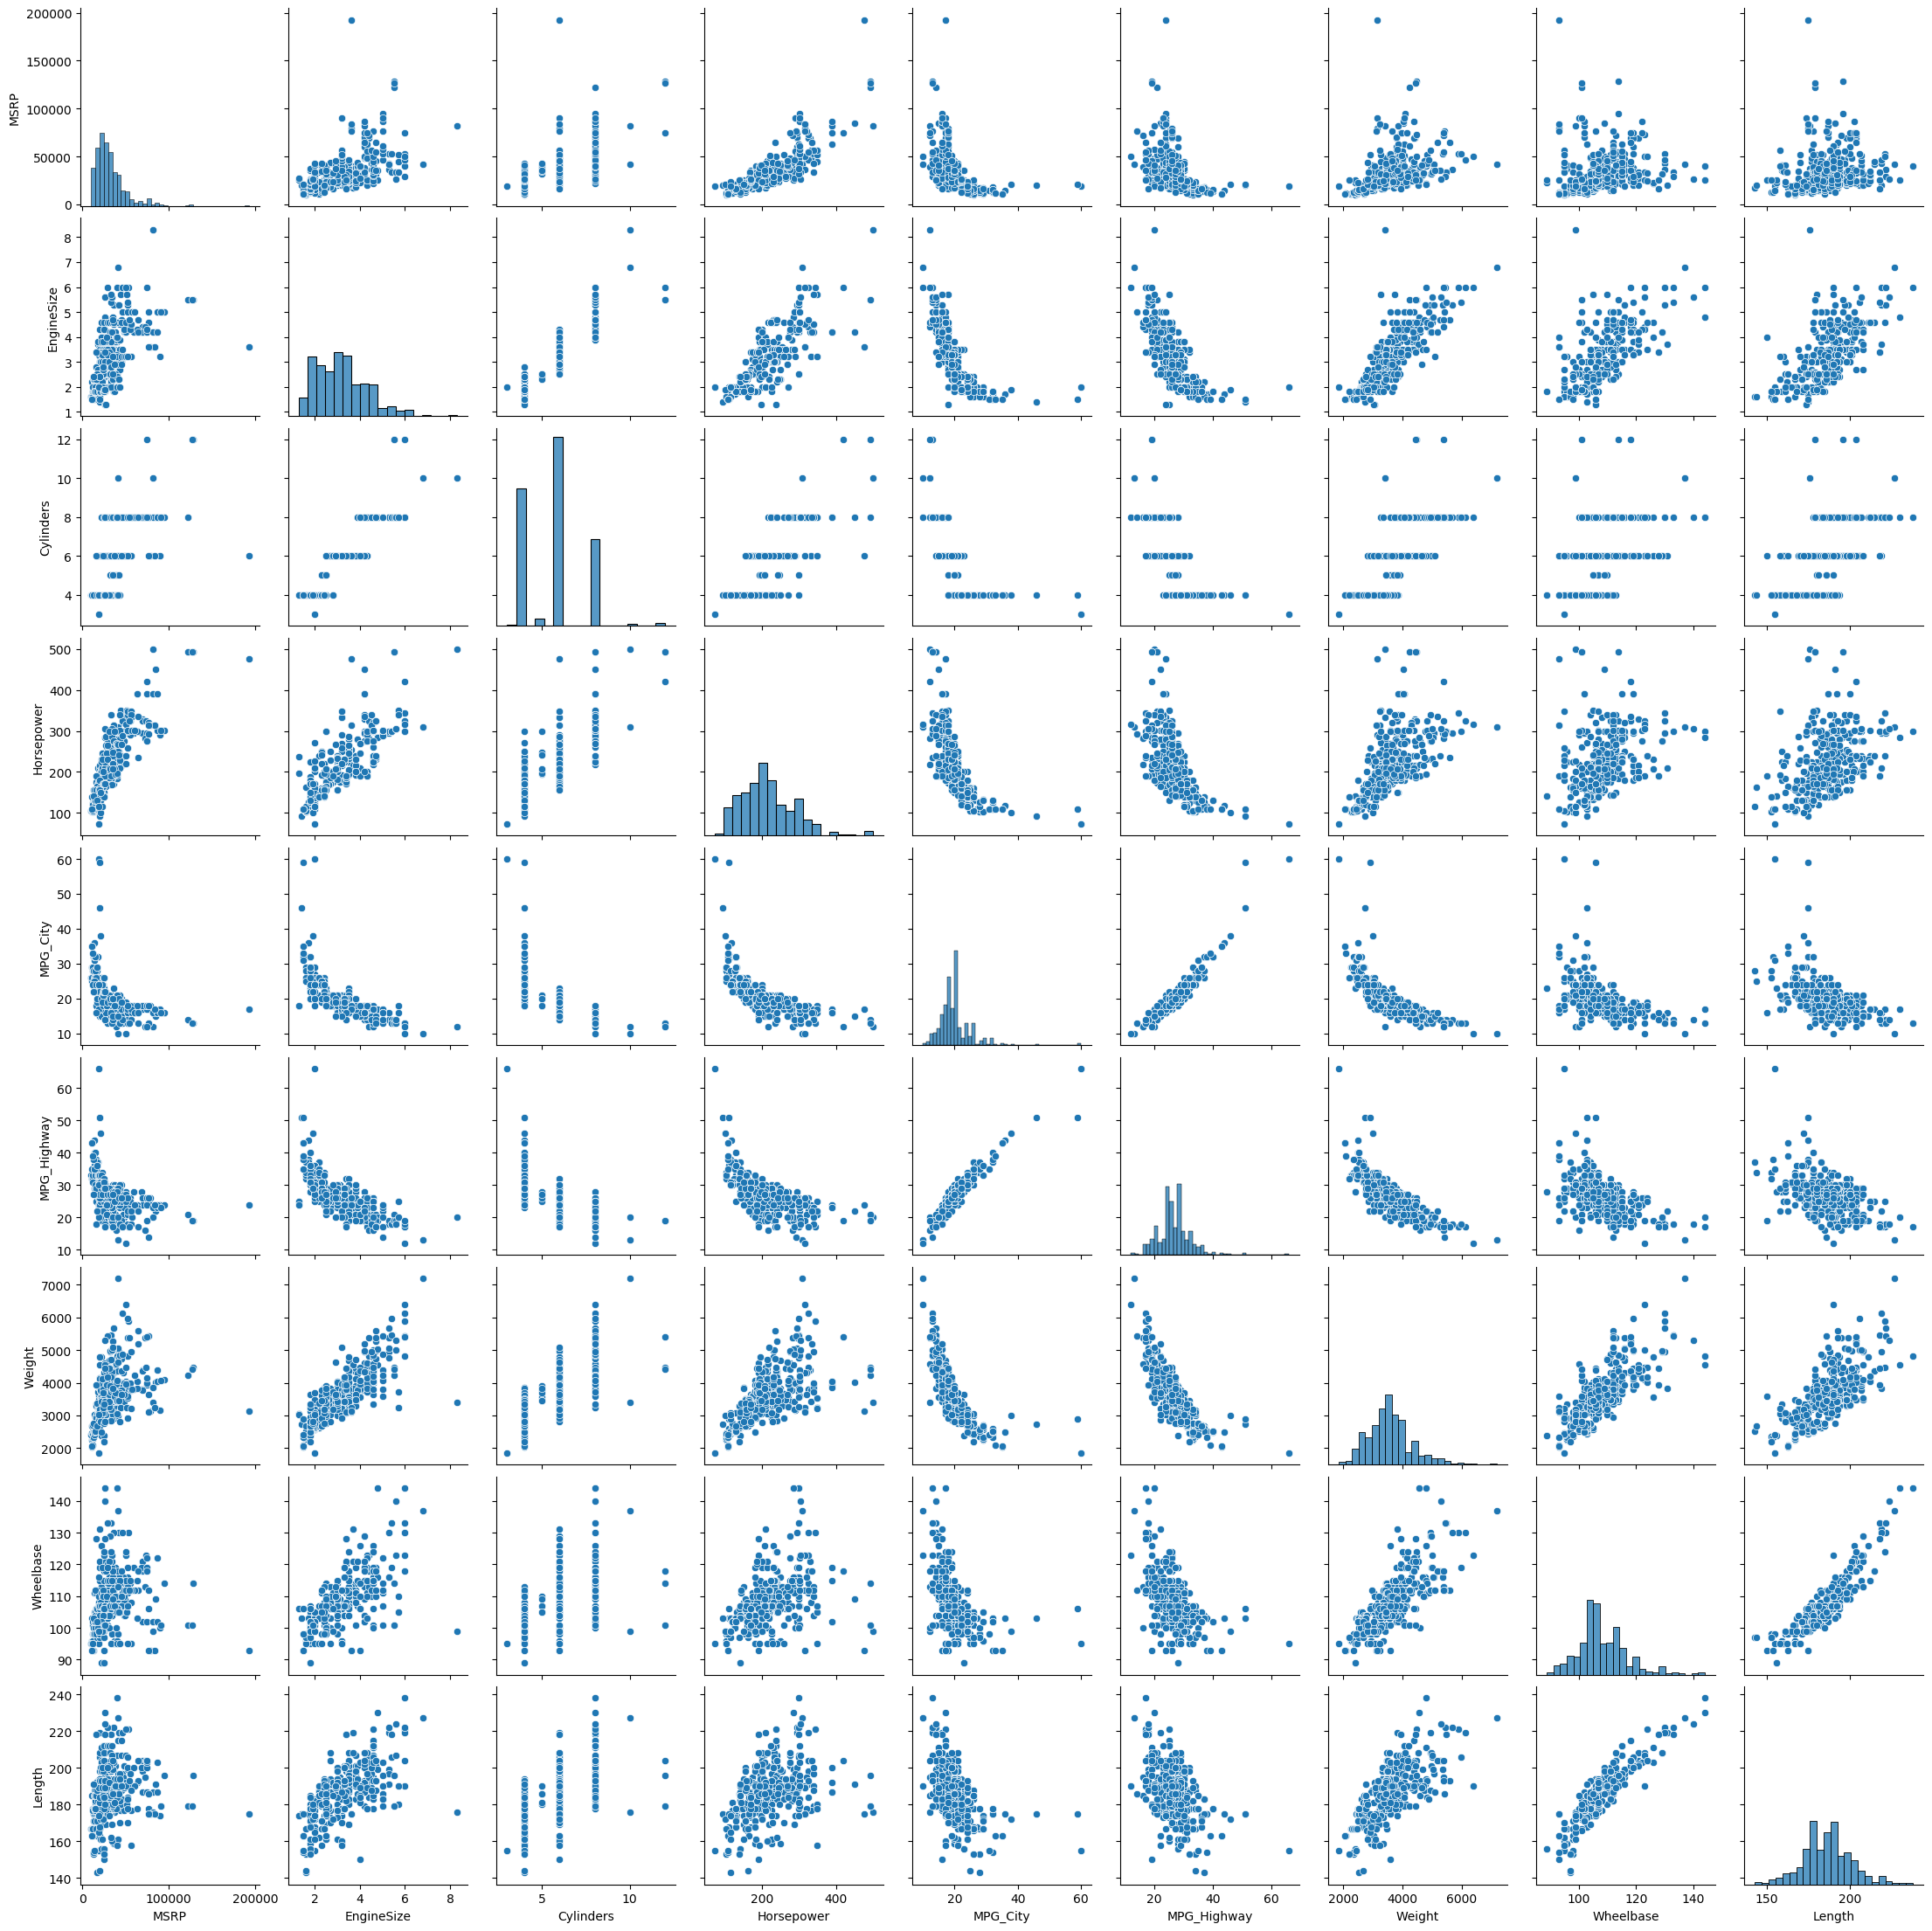

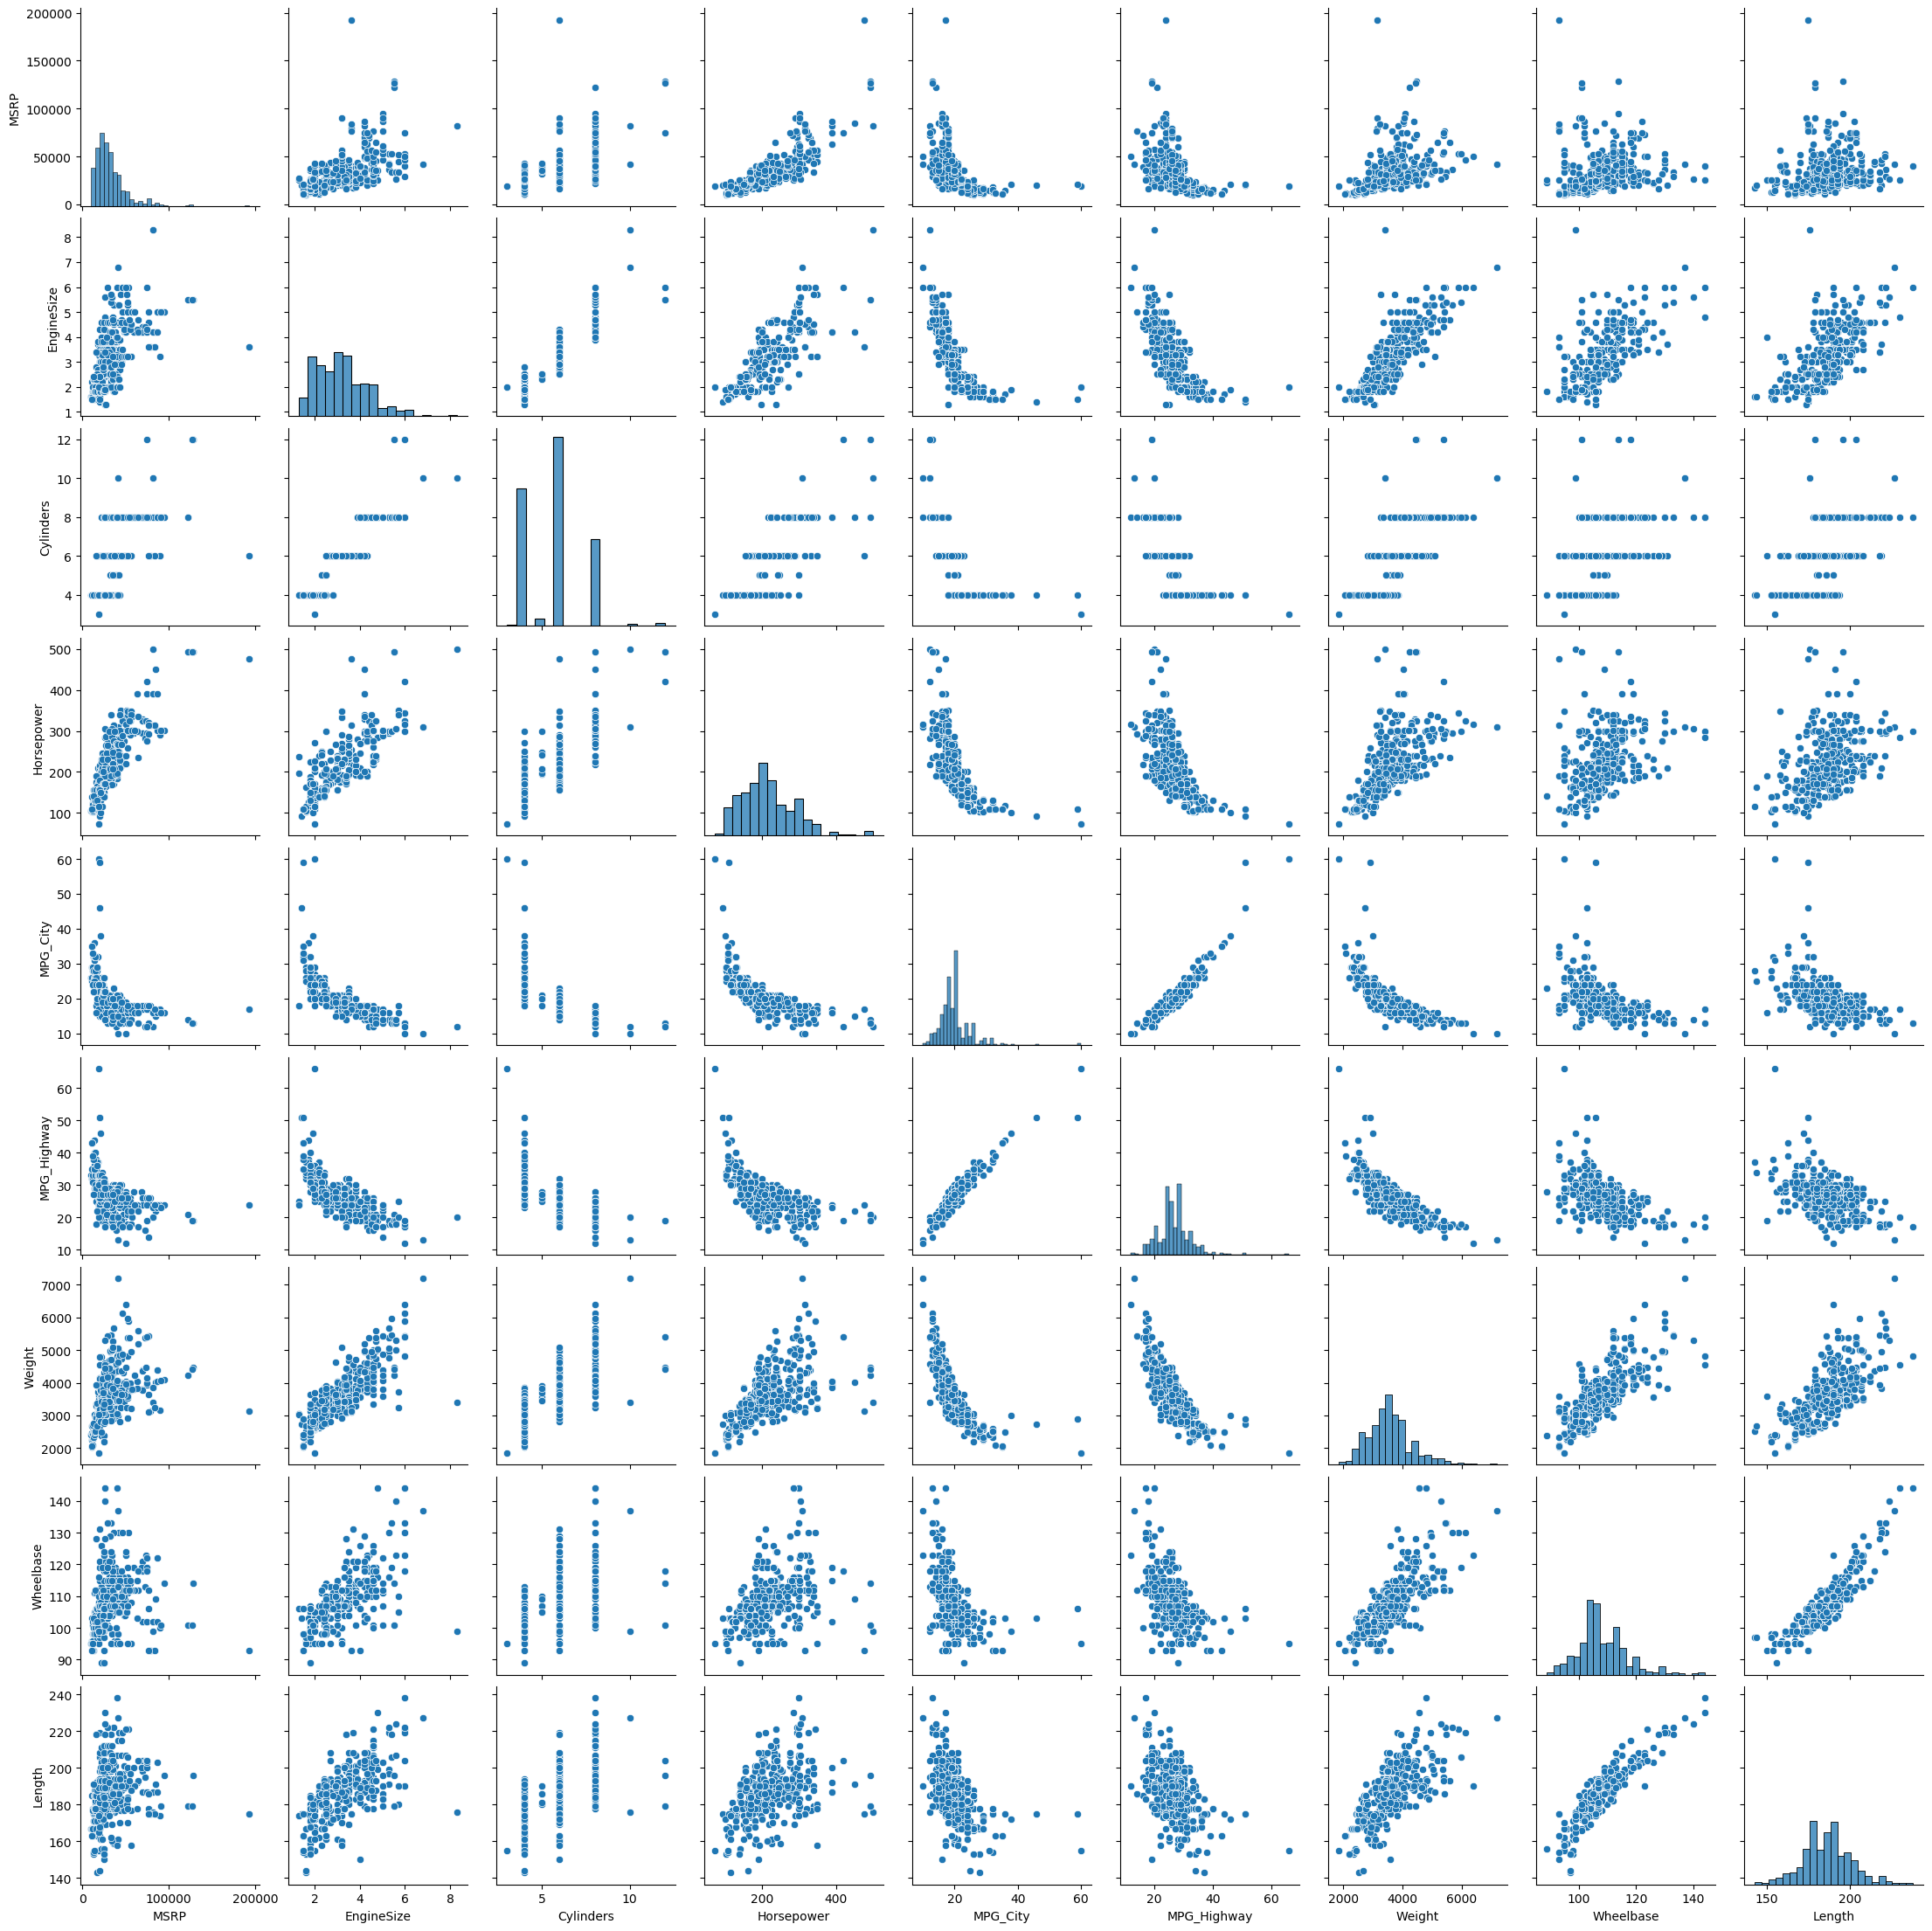

In [23]:
# scatterplots for joint relationships and histograms for univariate distributions
sns.pairplot(car_df) 
plt.show()

In [24]:
# Let's view various makes of the cars
car_df.Type.unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [32]:
car_df.Type.value_counts()

Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: Type, dtype: int64

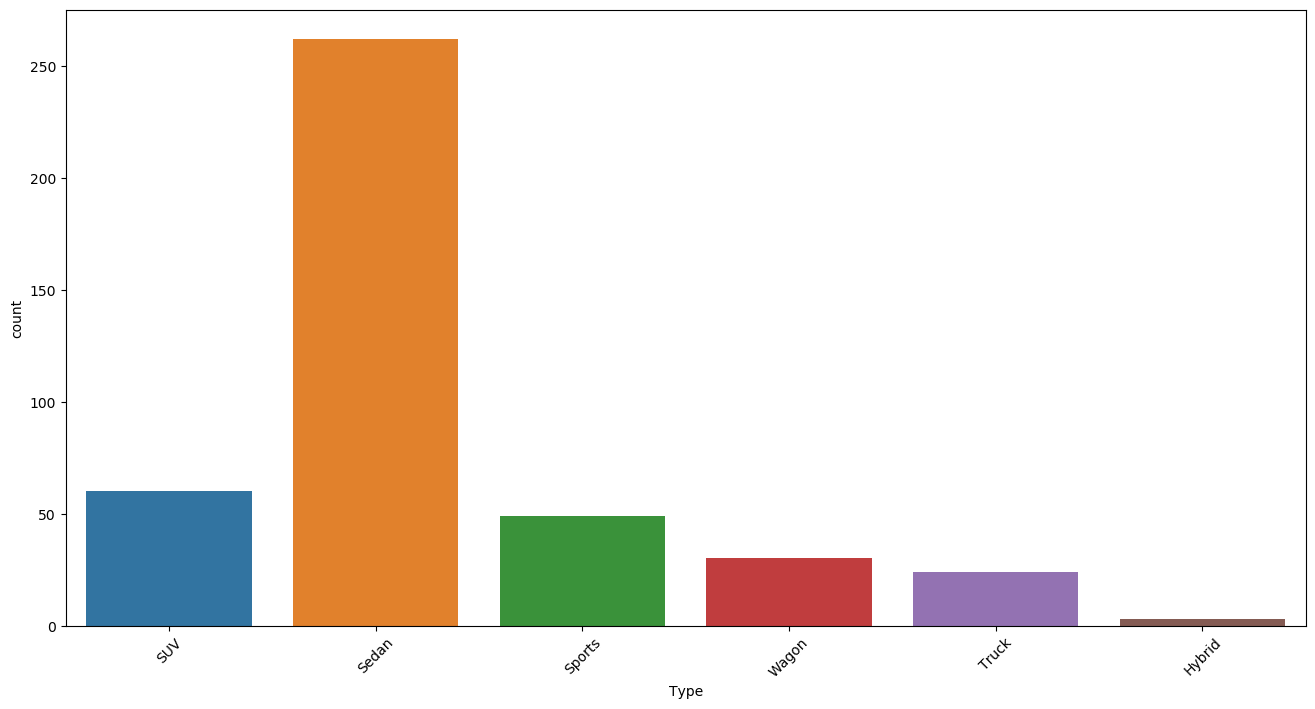

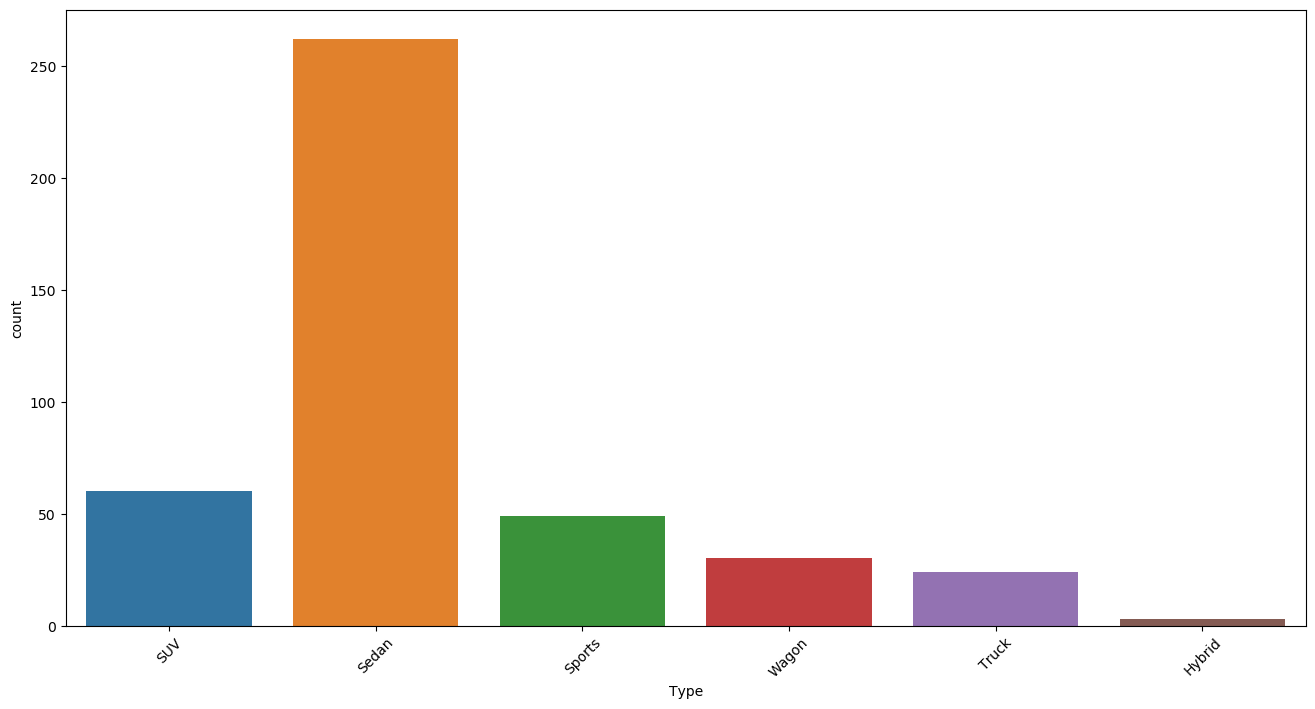

In [26]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Type'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);
plt.show()

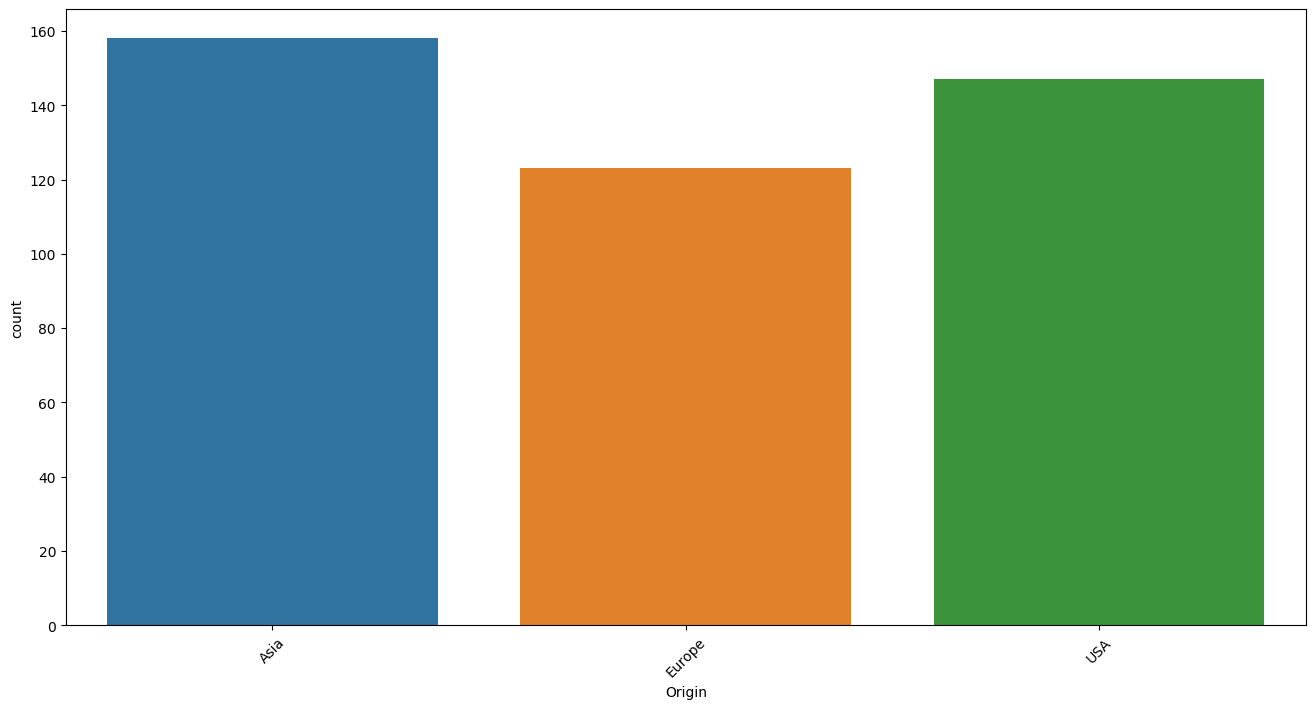

In [33]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Origin'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);
plt.show()

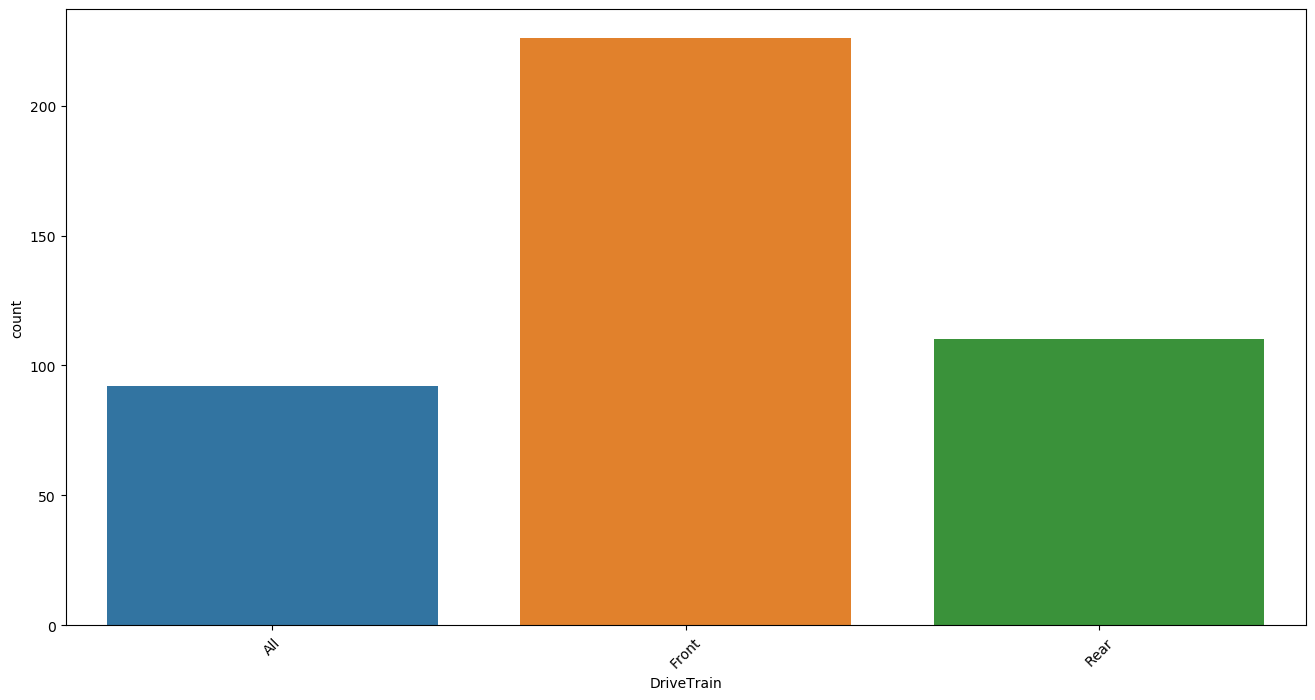

In [34]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['DriveTrain'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);
plt.show()

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **List all unique car makes in the dataset**
- **Using Seaborn, plot the countplot for the vehicle Make?**
- **List the top 3 brands?**

In [36]:
#My Solution
#1. List all unique car makes
car_df.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

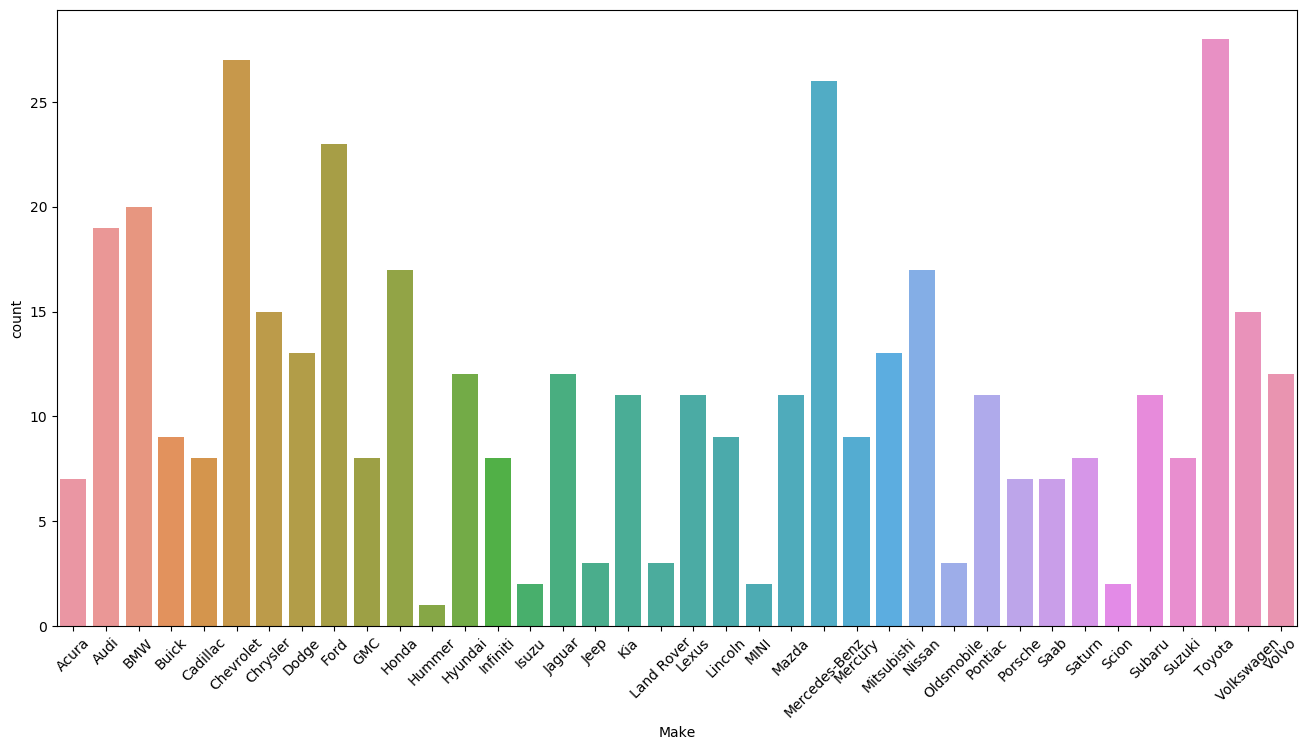

In [37]:
#2. Using seaborn, plot the countplot for the vehicle Make
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Make'])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()

# CODING TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION - PART #2

In [38]:
!pip install wordcloud
# Let's view the model of all used cars using WordCloud generator
from wordcloud import WordCloud, STOPWORDS

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/03/b3/6c9b82d2569d447443ed893215b5646811330f4de6f7370316691de72f1a/wordcloud-1.9.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 437.7/437.7 kB 5.0 MB/s eta 0:00:00:00:01
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [39]:
car_df

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565,2.4,5,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565,2.3,5,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210,2.9,6,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,26135,1.9,4,170,22,29,2822,101,180


In [41]:
text = car_df.Model.values
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [42]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [44]:
wc = WordCloud(background_color = "black", max_words = 2000, max_font_size = 100, random_state = 3, 
              stopwords = stopwords, contour_width = 3).generate(str(text))  


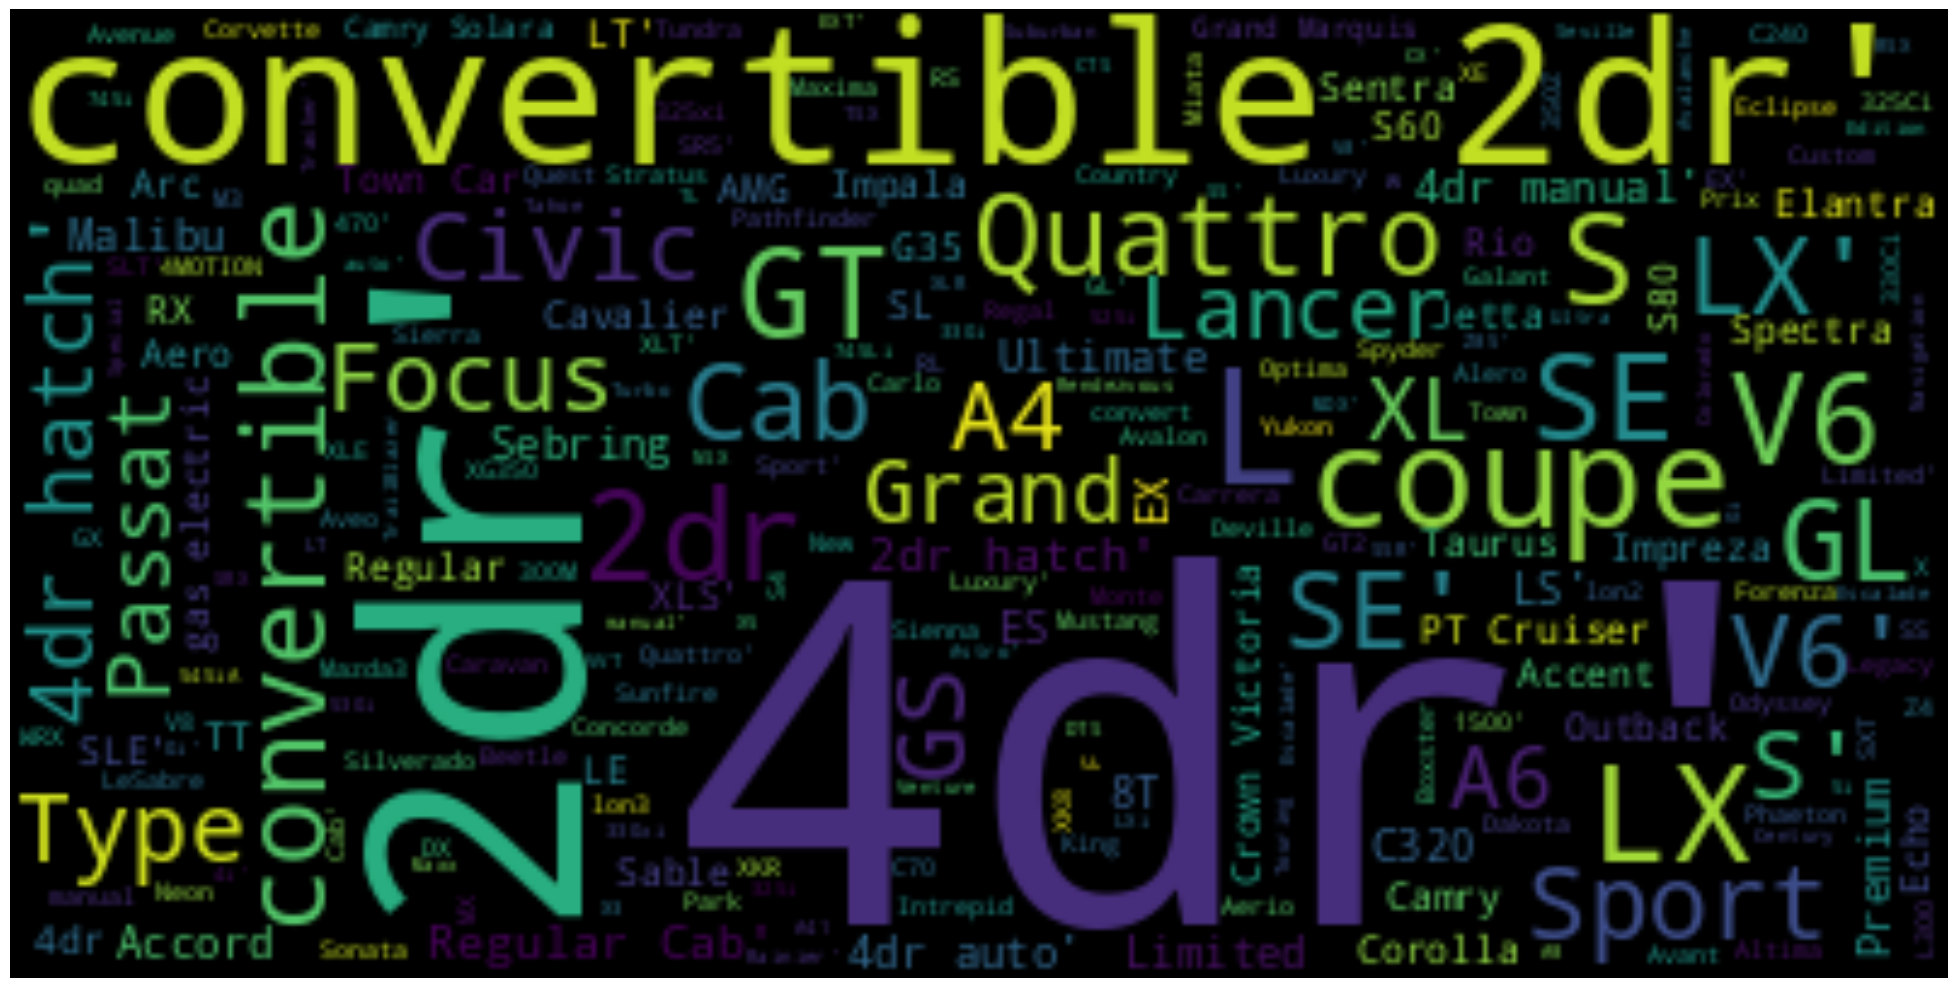

In [46]:
fig = plt.figure(figsize = (25, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Plot the correlation matrix**
- **Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?**

In [47]:
car_df.corr()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.571753,0.649308,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
EngineSize,0.571753,1.000000,0.908186,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649308,0.908186,1.000000,0.807523,-0.679872,-0.671488,0.742849,0.546337,0.549785
Horsepower,0.826945,0.787435,0.807523,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.709471,-0.679872,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.717302,-0.671488,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.807867,0.742849,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.636517,0.546337,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.637448,0.549785,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


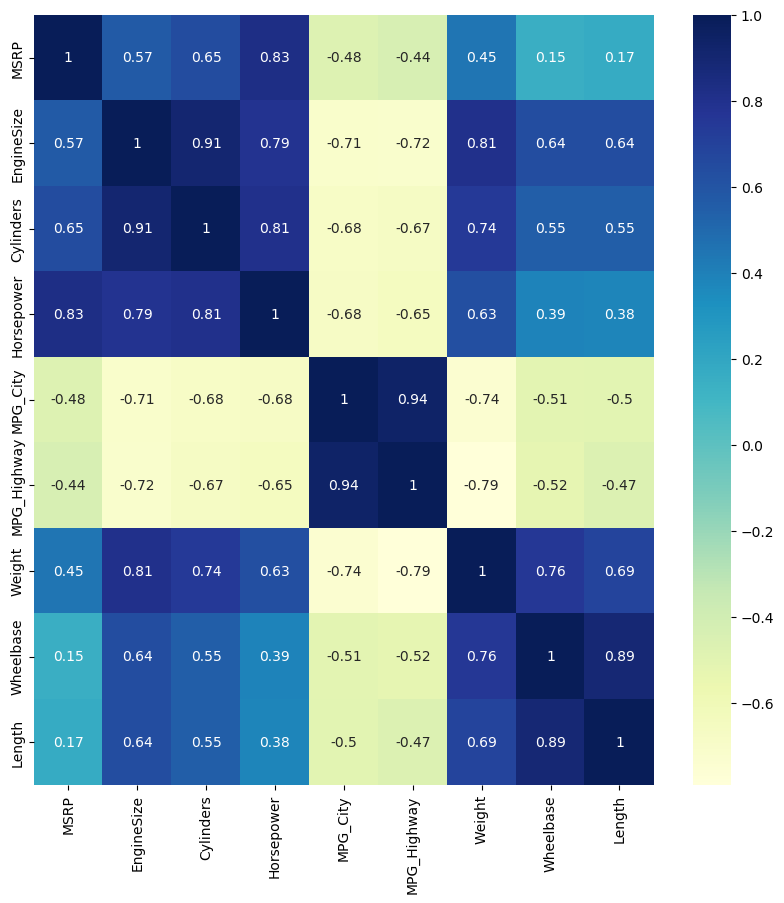

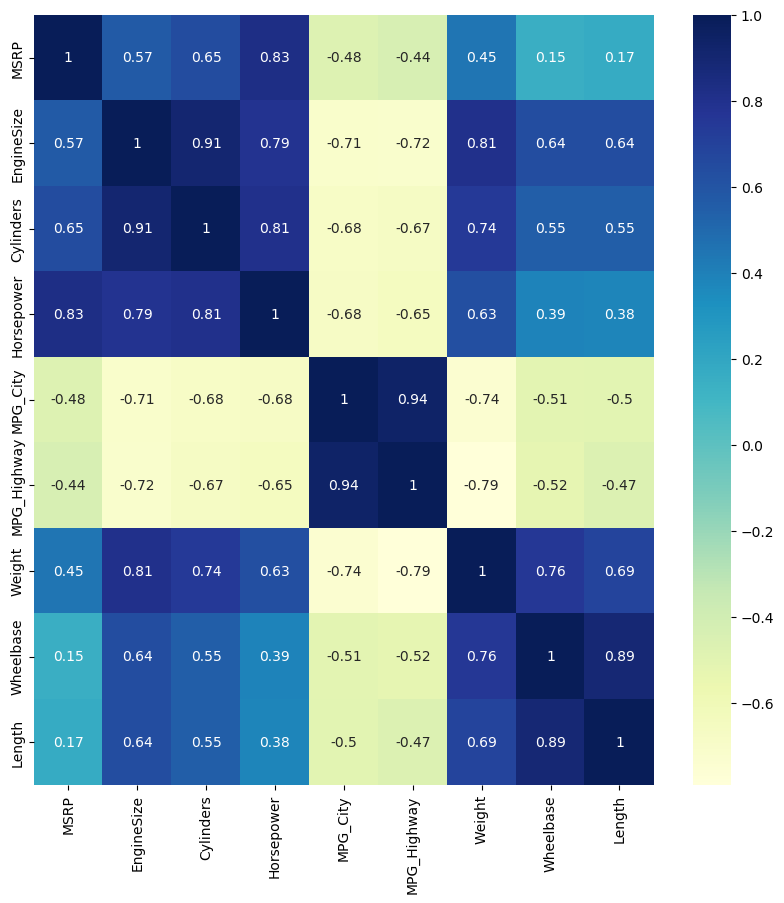

In [49]:
plt.figure(figsize = (10, 10))
sns.heatmap(car_df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

# CODING TASK #4: PREPARE THE DATA BEFORE MODEL TRAINING

In [50]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [51]:
# Perform One-Hot Encoding for "Make", "Model", "Type", "Origin", and "DriveTrain"
car_df = pd.get_dummies(car_df, columns=["Make", "Model", "Type", "Origin", "DriveTrain"])

In [52]:
car_df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0


In [53]:
# Feeding input features to X and output (MSRP) to y
X = car_df.drop("MSRP", axis = 1)
y = car_df["MSRP"]

In [ ]:
X = np.array(X)

In [ ]:
y = np.array(y)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

In [62]:
X_train.shape

(342, 483)

In [63]:
X_test.shape

(86, 483)

**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Perform train test split without indicating a test_size, what do you conclude?**

In [ ]:
#We coclude that if we do not declare the test size, 75% will be allocated for train and 25% for testing

# CODING TASK #5: TRAIN AND TEST A LINEAR REGRESSION MODEL IN SK-LEARN (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [67]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:

regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.8332092501368296

In [70]:
y_predict = regression_model_sklearn.predict(X_test)

In [71]:
y_predict

array([15562.91659182, 34292.11878003, 48334.25594678, 24212.51966309,
       26651.128798  , 39325.48007108, 38177.30663392, 45783.01665217,
       12207.64043232, 22411.24548824, 10908.45861113, 24052.6663087 ,
       45767.43746445, 25640.56040848, 36085.36330252, 58616.2045539 ,
       22121.07248112, 65726.24300142, 44381.3289206 , 37399.84489416,
       43916.84756087,  7625.73623024, 11503.02850996, 39833.55437516,
       32916.12292683,  7912.38525152, 13034.81153748, 14903.66837517,
       31625.91904924,  7131.1261543 , 33181.23605109, 36085.36330252,
       72428.34978026, 56870.40936234, 46520.00789406, 15455.52195189,
       20782.83635018, 16294.25609654, 27767.47282195, 26520.84317082,
       41806.59835144, 22555.19864295,  8681.38250796, 40102.7216391 ,
       37708.7016078 , 60712.49225142, 15994.01611359, 95814.21931594,
       15881.52277328, 10280.53028653, 34663.23530844, 16911.86210308,
       19963.5959544 , 63669.11473103, 14006.50797495, 23319.76910991,
      

In [72]:
k = 13 # List the number of independant variables
k

13

In [73]:
n = len(X_test)
n

86

In [74]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-( (1-r2)*(n-1) / (n-k-1))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 6968.433 
MSE = 48559063.33254009 
MAE = 5063.932187332616 
R2 = 0.8332092501368296 
Adjusted R2 = 0.8030942536337571


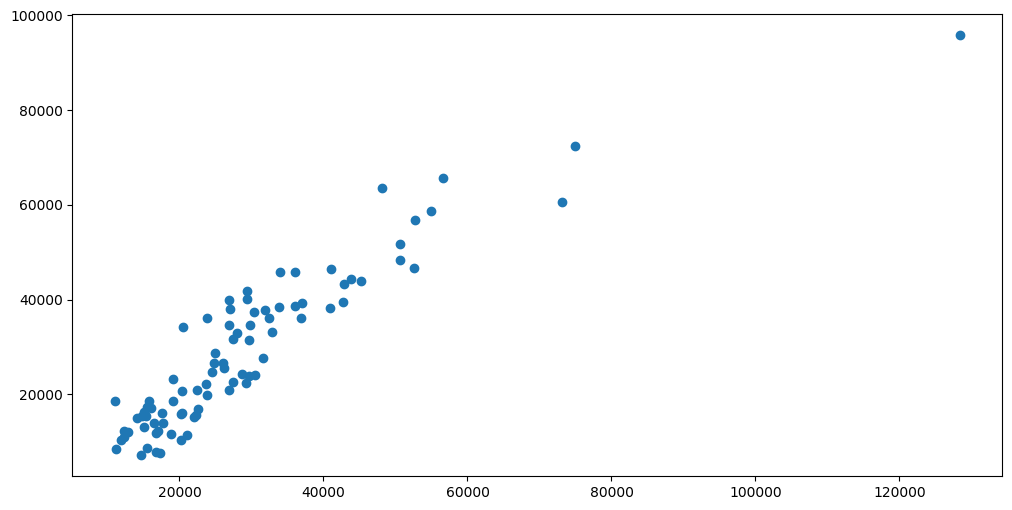

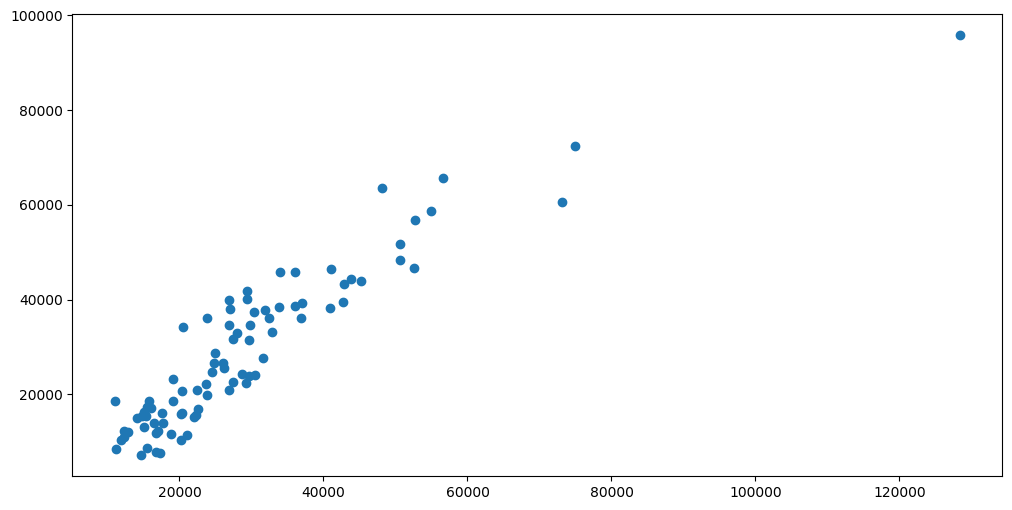

In [76]:
# Visualize how accurate predictions are relative to y_test
plt.figure(figsize = (12, 6))
plt.scatter(y_test, y_predict)
plt.show()

**PRACTICE OPPORTUNITY #5 [OPTIONAL]:**
- **Train a Random Forest Regressor**
- **Evaluate trained model performance**

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, max_depth = 10)
regressor.fit(X_train, y_train)
accuracy = regressor.score(X_test, y_test)
accuracy

0.902839855791907

In [78]:
y_predict = regressor.predict(X_test)
y_predict

array([21493.47331348, 18367.03103175, 43576.00520833, 23688.55522409,
       23238.75501316, 40048.47102793, 37649.16416396, 38682.55032086,
       17077.70791667, 27959.92554101, 15543.9972132 , 31828.61648045,
       42246.0625    , 26351.81958333, 35110.36031315, 57617.08841183,
       20859.44143908, 64343.38823676, 42165.61840278, 33238.72109776,
       41275.17740419, 15721.73134019, 20208.50738187, 41634.83122247,
       28391.87041182, 16461.36121032, 14402.67445175, 14611.09284461,
       31073.67844915, 14328.68118877, 32810.52380952, 35110.36031315,
       68868.15      , 47668.23076923, 39681.53169643, 15334.25005781,
       23685.7008841 , 14743.66612924, 29268.91950532, 30026.51431807,
       37968.99583333, 23473.38766795, 14388.99111842, 33257.68067426,
       32590.78098906, 69596.65357143, 18353.72993687, 95927.00568182,
       20325.18123646, 11486.78833333, 27698.40545983, 21661.01056839,
       25057.9593113 , 64457.88823676, 14928.78130781, 12301.975     ,
      

In [80]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-( (1-r2)*(n-1) / (n-k-1))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 5318.55 
MSE = 28286973.94711643 
MAE = 3065.3300101887935 
R2 = 0.902839855791907 
Adjusted R2 = 0.8852970519765568


# EXCELLENT JOB!

# PRACTICE OPPORTUNITIES SOLUTIONS

**PRACTICE OPPORTUNITY #1 SOLUTION:**
- **What is the maximum price of the used car?**
- **What is the minimum price of the used car?**

In [ ]:
car_df['MSRP'].max()

In [ ]:
car_df['MSRP'].min()

**PRACTICE OPPORTUNITY #2 SOLUTION:**
- **List all unique car makes in the dataset**
- **Using Seaborn, plot the countplot for the vehicle Make?**
- **List the top 3 brands?**

In [ ]:
car_df

In [ ]:
# Let's view various makes of the cars
car_df['Make'].unique()

In [ ]:
plt.figure(figsize = (16, 8))
sns.countplot(x = car_df['Make'])
locs, labels = plt.xticks();
plt.setp(labels, rotation = 45);

**PRACTICE OPPORTUNITY #3 SOLUTION:**
- **Plot the correlation matrix**
- **Comment on the correlation matrix, which feature has the highest positive correlation with MSRP?**

In [ ]:
# Obtain the correlation matrix
car_df.corr()

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(car_df.corr(), cmap="YlGnBu", annot = True);

In [ ]:
# Positive correlation between engine size and number of cylinders
# Positive correlation between horsepower and number of cylinders
# highest positive correlation with MSRP is = horsepower


**PRACTICE OPPORTUNITY #4 SOLUTION:**
- **Perform train test split without indicating a test_size, what do you conclude?**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

**PRACTICE OPPORTUNITY #5 SOLUTION:**
- **Train a Random Forest Regressor**
- **Evaluate trained model performance**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators= 20, max_depth= 10)
RandomForest_model.fit(X_train, y_train)
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

y_predict = RandomForest_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-( (1-r2)*(n-1) / (n-k-1))

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 